# Doubly constrained algorithm

## Generated and attracted trips

In [1]:
#om <- c(98,106,122) #Generated trips by zone
om <- c(55449,98180,110371);om
#om <- c(100,200,250)
#om <- c(35155,12000,22647); om <- round(om)

[1]  55449  98180 110371

In [2]:
#dm <- c(102,118,106) #Attracted trips by zone
#dm <- c(220,165,165)
dm <- round(rep(1/length(om),length(om)-1)*sum(om)); dm <- c(dm,sum(om)-sum(dm)) #Generated trips are evenly distributed across across zones 

In [3]:
nZones <- length(om); nZones #Number of zones

[1] 3

In [4]:
T <- sum(om); T #Total trips

[1] 264000

## Cost matrix

In [5]:
#cij <- matrix(c(1.0,1.2,1.8,1.2,1.0,1.5,1.8,1.5,1.0),3,3)
cij <- matrix(c(1,3,2,3,1,2,3,1,1),3,3)

In [6]:
cij

1,3,3
3,1,1
2,2,1


## Impedance function

In [7]:
#fcij <- function(c){1/c^2}
fcij <- function(c){5*exp(-0.5*c)}

In [8]:
fcij(cij)

3.032653,1.115651,1.115651
1.115651,3.032653,3.032653
1.839397,1.839397,3.032653


## Balancing factors

In [9]:
ai <- function(bj,dj,fcij,cij){
    
    nZones <- length(bj)
    ai <- c(rep(NA,nZones))
       
     for(i in 1:nZones){
        sum <- 0
       
        for(j in 1:nZones){
           sum  <- sum + bj[j]*dj[j]*fcij(cij)[i,j]
        }
        ai[i] <- 1/sum     
    }
    
    return(ai)
}

In [10]:
bj <- function(ai,oi,fcij,cij){
    
    nZones <- length(ai)
    bj <- c(rep(NA,nZones))
       
     for(i in 1:nZones){
        sum <- 0
       
        for(j in 1:nZones){
           sum  <- sum + ai[j]*oi[j]*fcij(cij)[j,i]
        }
        bj[i] <- 1/sum       
    }
    
    return(bj)
}

## OD Matrix

In [11]:
ODMatrix <- function(ai,bj,oi,dj,fcij,cij){
    
    nZones <- length(ai)
    odmatrix <- diag(nZones)*0
    
    for(i in 1:nZones){
        for(j in 1:nZones){
           odmatrix[i,j] <- ai[i]*bj[j]*oi[i]*dj[j]*fcij(cij)[i,j]
        }     
    }
    
    return(odmatrix)
    
}

# Compute the number of generated trips by zone

on <- function(odm){
    
    return(rowSums(odm))
}


# Compute the number of attracted trips by zone


dn <- function(odm){
    
    return(colSums(odm))
}


## Function for entropy calculation

In [12]:
entropyCalculation <- function(m){
    
    #total trips in matrix
    trips_m <- sum(m)
    numerator <- factorial(trips_m)
    
    
    denominator <- 1
    
    for(i in 1:dim(m)[1]){
        
        for(j in 1:dim(m)[2]){
    
            denominator <- denominator*factorial(m[i,j])    
            

        }
    }
    
    entropym <- numerator/denominator
    
    return(entropym)
    
}

## General algorithm for n iterations

In [13]:
doublyConstrainedAlgorithm <- function(om,dm,cij,fcij,nIterations){

    nZones <- length(om) #Number of zones
    
    an <- c(rep(NA,nZones))
    bn <- c(rep(NA,nZones))
    ODn <- diag(nZones)*0
    
    an1 <- an
    bn1 <- bn
    ODn1 <- ODn
    
    
    for(i in 1:nIterations){
        
        if(i==1){
            an <- ai(bj = c(rep(1,nZones)),dj = dm,fcij = fcij, cij = cij)
            bn <- bj(ai = an,oi = om,fcij = fcij, cij = cij)
            ODn <- ODMatrix(ai=an,bj=bn,oi=om,dj=dm,fcij=fcij,cij=cij)
            
        }
        
        else{
            
            an1 <- ai(bj = bn,dj = d1,fcij = fcij, cij = cij)
            bn1 <- bj(ai = an1,oi = om,fcij = fcij, cij = cij)
            ODn1 <- ODMatrix(ai=an1,bj=bn1,oi=om,dj=dm,fcij=fcij,cij=cij)
            
            error <- sum(abs(ODn1-ODn))
            
            an <- an1
            bn <- bn1
            ODn <- ODn1
            
        }
        
        
    }
    
#    return(list(ODMatrix=ODn,oi=on(ODn),dj=dn(ODn),entropy = entropyCalculation(ODn)))
        return(list(ODMatrix=ODn,oi=on(ODn),dj=dn(ODn),cij = cij,C = sum(fcij(cij)*ODn),error = error))
    
}

## Iterations

### Iteration 0

#### Balancing factors

In [14]:
a0 <- c(rep(1,nZones)); a0

[1] 1 1 1

In [15]:
b0 <- c(rep(1,nZones)); b0

[1] 1 1 1

### Iteration 1

#### Balancing factors

In [16]:
a1 <- ai(bj = c(rep(1,nZones)),dj = dm,fcij = fcij, cij = cij); a1

[1] 2.158764e-06 1.582468e-06 1.693172e-06

In [17]:
b1 <- bj(ai = a1,oi = om,fcij = fcij, cij = cij); b1

[1] 1.1362490 1.0543413 0.8536417

#### OD Matrix

In [18]:
OD1 <- ODMatrix(ai=a1,bj=b1,oi=om,dj=dm,fcij=fcij,cij=cij); OD1

36297.59,12390.56,10031.95
17331.75,43716.43,35394.77
34370.65,31893.01,42573.28


#### Attracted and generated trips by zone

In [19]:
o1 <- on(OD1); o1

[1]  58720.11  96442.94 108836.95

In [20]:
d1 <- dn(OD1); d1

[1] 88000 88000 88000

### Iteration 2

In [21]:
a2 <- ai(bj = b1,dj = dm,fcij = fcij, cij = cij); a2

[1] 2.038506e-06 1.610970e-06 1.717037e-06

In [22]:
b2 <- bj(ai = a2,oi = om,fcij = fcij, cij = cij); b2

[1] 1.1522947 1.0478319 0.8471081

In [23]:
OD2 <- ODMatrix(ai=a2,bj=b2,oi=om,dj=dm,fcij=fcij,cij=cij); OD2

34759.60,11628.09,9400.599
17893.08,44229.05,35756.487
35347.32,32142.86,42842.914


In [24]:
o2 <- on(OD2); o2

[1]  55788.29  97878.62 110333.10

In [25]:
d2 <- dn(OD2); d2

[1] 88000 88000 88000

### Iteration (N=10)

In [26]:
N=6
doublyConstrainedAlgorithm(om=om,dm=dm,cij=cij,fcij=fcij,nIterations=N)

34584.59,11536.68,9327.795
17989.16,44340.21,35850.572
35426.25,32123.11,42821.632
1,3,3
3,1,1
2,2,1


### Analysis of convergency

In [27]:
nConvergency <- 10 #iterations

#Compute error from the second iterations until de nth iteration
convergency <- data.frame(iteration=2:nConvergency, error = sapply(2:nConvergency,function(i) doublyConstrainedAlgorithm(om=om,dm=dm,cij=cij,fcij=fcij,nIterations=i)$error))
convergency$error <- round(convergency$error,4)                                                        

### Plot

iteration,error
2,5863.6434
3,669.8119
4,80.1140
5,9.4600
6,1.1157
7,0.1316
8,0.0155
9,0.0018
10,0.0002


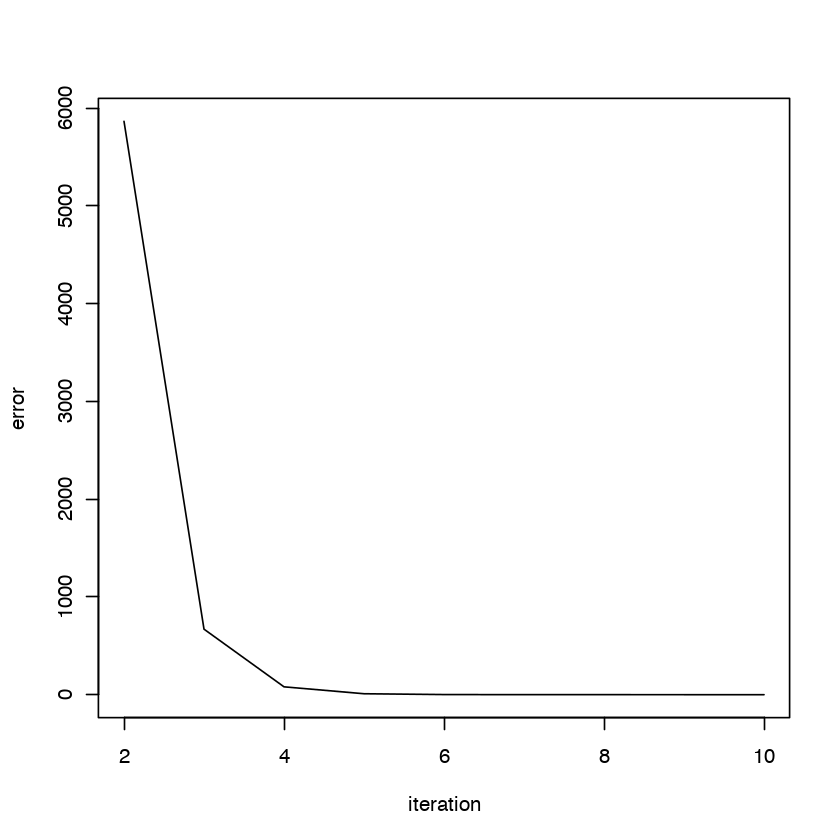

In [28]:
plot(convergency, type="l")
convergency